<a href="https://colab.research.google.com/github/kapsonic/collabs/blob/main/Stock_Max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

class ResistanceBand:
    def __init__(self, lower=None, upper=None, price=None):
        if price:
            self.upper = round(price * 1.01)
            self.lower = round(price * 0.99)
            self.close = price
        elif lower and upper:
            self.lower = round(lower)
            self.upper = round(upper)
            self.close = (self.lower + self.upper)/2

    def in_band(self, price):
        return self.lower <= price <= self.upper

    def is_colliding(self, band):
        if self.lower <= band.lower <= self.upper:
            return True
        if self.lower <= band.upper <= self.upper:
            return True

    def how_far(self, current_price):
        if self.lower <= current_price <= self.upper:
            return 0

        if current_price > self.upper:
            return (current_price - self.upper)*100/current_price

        if current_price < self.lower:
            return (self.lower - current_price)*100/current_price

    def __str__(self):
        return f"Resistance Zone {self.lower} - {self.upper} for Price {self.close}"


def merge_band(band1: ResistanceBand, band2: ResistanceBand):
    if band1.is_colliding(band2) or band2.is_colliding(band1):
        return ResistanceBand(min(band1.lower, band2.lower), max(band1.upper, band2.upper))
    return None



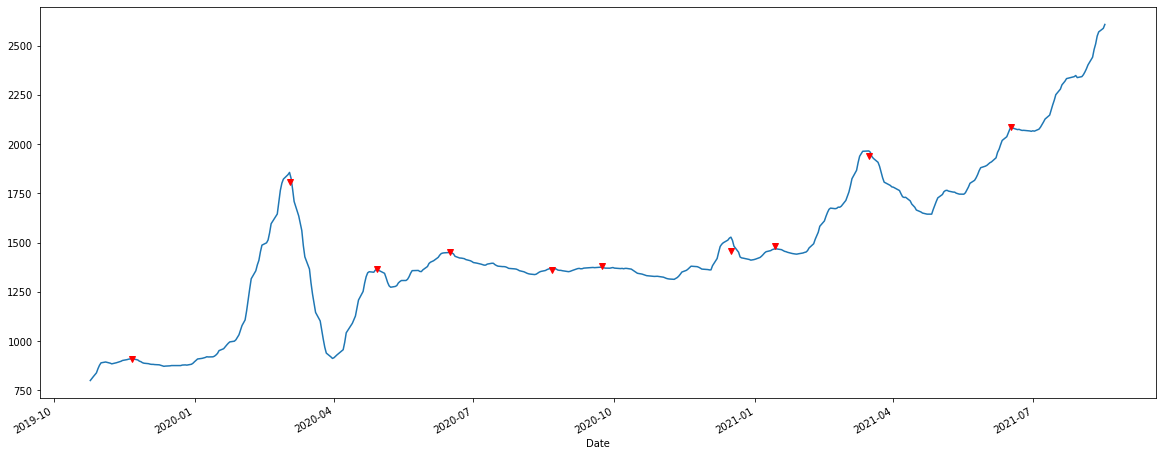

In [ ]:
data = pd.read_csv('irctc.csv', index_col='Date', parse_dates=True)
df = data.Close.rolling(9).mean()
df.plot(figsize=(20,8))
local_max = signal.argrelextrema(df.values, np.greater, order=10)[0]
data.iloc[local_max].High.plot(style='.', lw=10, color='red', marker="v");
max_data = df.iloc[local_max]

In [ ]:
bands = []
count = 0
for row in max_data:
    count += 1
    new_band = ResistanceBand(price=round(row))
    is_merged = False
    if len(bands) > 0:
        temp_array = []
        for b in bands:
            if b.is_colliding(new_band):
                merged = merge_band(b, new_band)
                is_merged = True
                index = bands.index(b)
                bands.remove(b)
                bands.insert(index, merged)
                break

    if not is_merged:
        bands.append(new_band)
for b in bands:
  print(b)

Resistance Zone 900 - 918 for Price 909
Resistance Zone 1837 - 1875 for Price 1856
Resistance Zone 1349 - 1389 for Price 1369.0
Resistance Zone 1436 - 1484 for Price 1460.0
Resistance Zone 1512 - 1542 for Price 1527
Resistance Zone 1945 - 1985 for Price 1965
Resistance Zone 2069 - 2111 for Price 2090


In [ ]:
current_price = 2400
lowest_distance = 100
lowest_band = None
for b in bands:
    if b.how_far(current_price) < lowest_distance:
        lowest_distance = b.how_far(current_price)
        lowest_band = b

print(round(lowest_distance,2), str(lowest_band))

12.04 Resistance Zone 2069 - 2111 for Price 2090
